# Required Skill for Data Analyst in India based on real world data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import os
import datetime
from pandas.io import gbq #to access the data from bigquary
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import MWETokenizer
import pickle
import nltk.data
from nltk import word_tokenize,sent_tokenize

In [8]:
quary = """select * from `data-analyst-371319.Data_Analyst_India.Data_Analyst_job`"""
dajob = gbq.read_gbq(quary, project_id="data-analyst-371319")

In [9]:
dajob

,title,company_name,location,via,description,thumbnail,job_id,posted_at,schedule_type,work_from_home,date_time,search_term,search_location
0,Data Analyst,Code Eleven,"Surat, Gujarat",via LinkedIn,JOB DESCRIPTION:\n• Collecting data from vario...,None,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,37 minutes ago,Full–time,<NA>,2022-12-15 13:38:09.648602,data analyst,India
1,Data Analyst | 6 to 9 Years | Bengaluru,Capgemini,"Mumbai, Maharashtra",via Indeed,Job Description\n• Coordinate with multiple pe...,https://encrypted-tbn0.gstatic.com/images?q=tb...,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCA2IHRvID...,40 minutes ago,Full–time,<NA>,2022-12-15 13:38:09.648602,data analyst,India
2,Data Analyst,People Tech Group Inc,"Hyderabad, Telangana",via LinkedIn,Job Description:\n\nThe Data Security Analyst ...,https://encrypted-tbn0.gstatic.com/images?q=tb...,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,28 minutes ago,Full–time,<NA>,2022-12-15 13:38:09.648602,data analyst,India
3,"Senior Data Analyst, IT Applications",Dimensions,"Mumbai, Maharashtra",via LinkedIn,"Job Title: Senior Data Analyst, IT Application...",None,eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0LC...,40 minutes ago,Full–time,<NA>,2022-12-15 13:38:09.648602,data analyst,India
4,Data Analyst and Data Science,InfoDesk Computer Education,"Mumbai, Maharashtra",via Quikr,We Provide6 Months of Data Analyst and Data Sc...,None,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgYW5kIERhdG...,5 hours ago,Full–time,<NA>,2022-12-15 13:38:09.648602,data analyst,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,Manager_ Business Analyst,_VOIS,"Pune, Maharashtra",via LinkedIn,Description\n\nThe Business Intelligence (BI) ...,https://encrypted-tbn0.gstatic.com/images?q=tb...,eyJqb2JfdGl0bGUiOiJNYW5hZ2VyXyBCdXNpbmVzcyBBbm...,16 hours ago,Full–time,<NA>,2022-12-16 07:00:51.553102,data analyst,India
870,Data Quality Manager,Persistent Systems,"Pune, Maharashtra",via LinkedIn,About Position\n\nThe post holder will provide...,https://encrypted-tbn0.gstatic.com/images?q=tb...,eyJqb2JfdGl0bGUiOiJEYXRhIFF1YWxpdHkgTWFuYWdlci...,23 hours ago,Full–time,<NA>,2022-12-16 07:00:51.553102,data analyst,India
871,AWS Data Engineer with Snowflake,Applied AI Consulting (AAIC),"Pune, Maharashtra",via LinkedIn,Experience: 6-8 yrs\n\nNotice Period: Immediat...,https://encrypted-tbn0.gstatic.com/images?q=tb...,eyJqb2JfdGl0bGUiOiJBV1MgRGF0YSBFbmdpbmVlciB3aX...,2 hours ago,Full–time,<NA>,2022-12-16 07:00:51.553102,data analyst,India
872,Data Warehouse Consultant,Innover Digital,"Pune, Maharashtra",via LinkedIn,Position- Data Warehouse Consultant\n\nNeed to...,None,eyJqb2JfdGl0bGUiOiJEYXRhIFdhcmVob3VzZSBDb25zdW...,19 hours ago,Full–time,<NA>,2022-12-16 07:00:51.553102,data analyst,India


In [10]:
dajob.shape

(874, 13)

In [11]:
dajob.isnull().sum()

title                0
company_name         0
location             0
via                  0
description          0
thumbnail          328
job_id               0
posted_at            0
schedule_type        0
work_from_home     757
date_time            0
search_term          0
search_location      0
dtype: int64

### Removeing dublicates

In [12]:
print(f"Number of Rows: {len(dajob)}")
print(f"Number of Duplicate Rows: {dajob.shape[0]-(dajob.job_id.value_counts()).shape[0]}") #Number of dubliacte values
df = dajob.drop_duplicates(subset="job_id") # Removing dublicates value 
print(f"unique rows: {df.shape[0]}")

Number of Rows: 874
Number of Duplicate Rows: 291
unique rows: 583


# Exploratory Data Analysis

In [13]:
df["via"] = list(map(lambda x:x.replace("via",""),df["via"])) # Removing via from the columns

C:\Users\Karthick\AppData\Local\Temp\ipykernel_9224\1015186418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["via"] = list(map(lambda x:x.replace("via",""),df["via"])) # Removing via from the columns


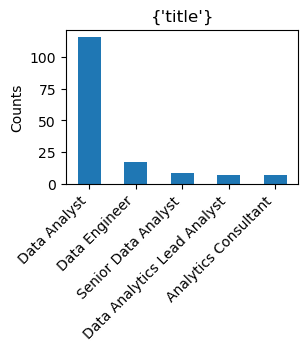

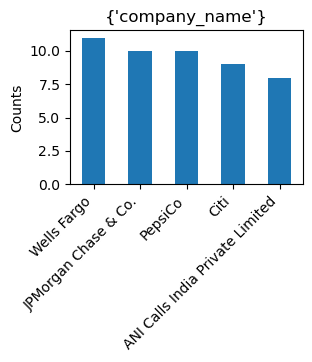

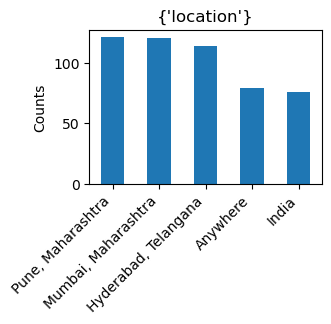

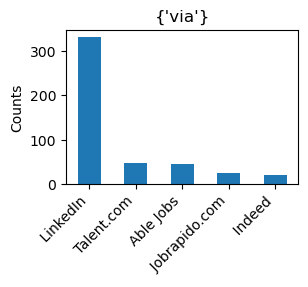

In [14]:
def bar(column):
    df[column].value_counts()[:5].plot(kind="bar",figsize=(3,2))
    plot.ylabel("Counts")
    plot.title({column})
    plot.xticks(rotation = 45, ha='right')
    plot.show()

col = ['title', 'company_name', 'location', 'via']

for i in col:
    bar(i)

# Cleaning the data

In [16]:
# keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = ['sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql','spacy']

keywords_libraries = ['scikit-learn', 'jupyter', 'theano', 'openCV', 'spark', 'nltk', 'mlpack', 'chainer', 'fann', 'shogun', 
'dlib', 'mxnet', 'node.js', 'vue', 'vue.js', 'keras', 'ember.js', 'jse/jee','streamlit']

keywords_analyst_tools = ['excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',]

keywords_cloud_tools = ['aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora',]

# Not using
keywords_general_tools = ['microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', ]

# Not using
keywords_general = ['coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', ]
keywords = keywords_programming + keywords_libraries + keywords_analyst_tools + keywords_cloud_tools

In [17]:
import time
start = time.time()
df = df.reset_index() #Resetting index
try:
    df = df.drop(["index"], axis=1)#Removing index
except:
    df = df
df["description"] = df.description.fillna("No data") #this is to treate the null values
df["Tokenized_description"] = list(map(lambda x:x.lower(),df.description)) #changing each rows values into lower case
df["Tokenized_description"] = list(map(lambda x:word_tokenize(x),df["Tokenized_description"])) #Tokenizing the values
multi_tokens = [('power', 'bi'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic')]
tokenizer = MWETokenizer(multi_tokens)# To handle muliple words simply after tokenizing powerbi will be in the from of power,bi so converting ito power_bi
df["Tokenized_description"] = list(map(lambda x:tokenizer.tokenize(x),df["Tokenized_description"]))
df["Tokenized_description"] = list(map(lambda x:list(set(x)),df["Tokenized_description"])) #Removing the duplicate values in each rows ex.["sql","python","sql"] to ["sql","python"]
#extraction the matching keywords from rows
def keywordss(x):
    a = []
    for i in x:
        if i in keywords:
            a.append(i)
    return(a)
df["Tokenized_description"] =  df["Tokenized_description"].apply(keywordss)
#converting words eg:power_id to powerid
def remove(x):
    a = []
    for i in x:
        if i == "power_bi":
            a.append("powerbi")
        elif i == "spreadsheet":
            a.append("spreadsheets")
        else:
            a.append(i)
    return a
df["Tokenized_description"] =  df["Tokenized_description"].apply(remove)

In [18]:
a = pd.DataFrame(df.Tokenized_description.sum()).value_counts().rename_axis("I").reset_index(name='counts')

In [19]:
a

,I,counts
0,sql,296
1,python,209
2,excel,178
3,powerbi,114
4,tableau,109
...,...,...
91,plotly,1
92,aurora,1
93,powershell,1
94,matlab,1


In [20]:
count_keywords = pd.DataFrame(df.Tokenized_description.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')
count_keywords

,keywords,counts
0,sql,296
1,python,209
2,excel,178
3,powerbi,114
4,tableau,109
...,...,...
91,plotly,1
92,aurora,1
93,powershell,1
94,matlab,1


In [21]:
def filtered_keywords(jobs_filtered, keywords, title="Keyword Analysis", head=10):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.Tokenized_description.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plot.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plot.xlabel("")
    plot.ylabel("Likelyhood to be in job posting (%)")
    plot.xticks(rotation = 45, ha='right')
    plot.title(title) 
    plot.show(g)
    print(count_keywords)

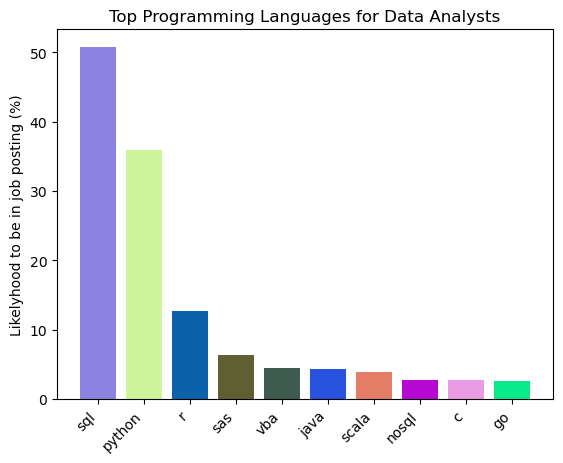

   keywords  counts  percentage
0       sql     296   50.771870
1    python     209   35.849057
5         r      74   12.692967
11      sas      37    6.346484
13      vba      26    4.459691
14     java      25    4.288165
16    scala      23    3.945111
27    nosql      16    2.744425
28        c      16    2.744425
29       go      15    2.572899


In [22]:
filtered_keywords(df, keywords_programming, title="Top Programming Languages for Data Analysts")

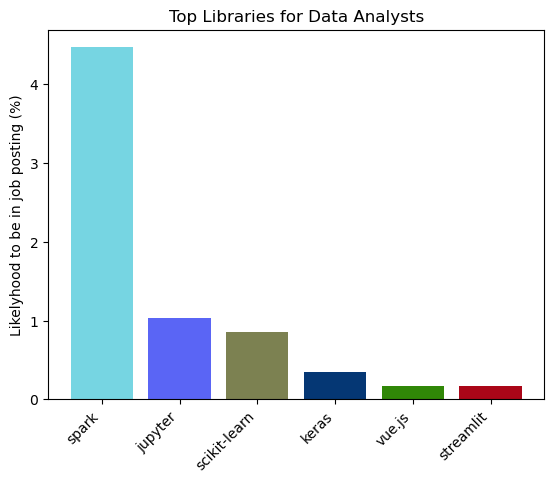

        keywords  counts  percentage
12         spark      26    4.459691
51       jupyter       6    1.029160
58  scikit-learn       5    0.857633
80         keras       2    0.343053
83        vue.js       1    0.171527
87     streamlit       1    0.171527


In [23]:
filtered_keywords(df, keywords_libraries, title="Top Libraries for Data Analysts")

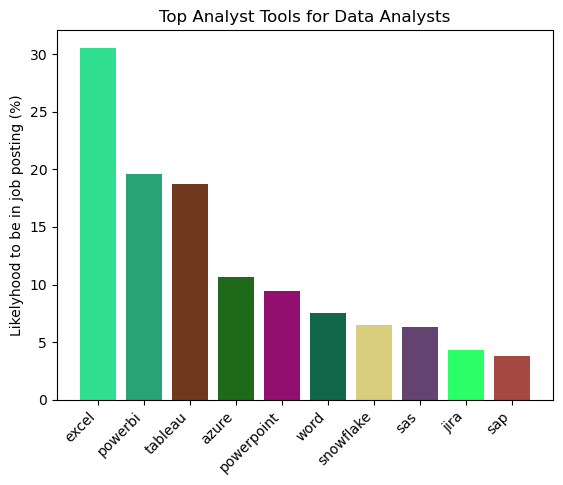

      keywords  counts  percentage
2        excel     178   30.531732
3      powerbi     114   19.554031
4      tableau     109   18.696398
7        azure      62   10.634648
8   powerpoint      55    9.433962
9         word      44    7.547170
10   snowflake      38    6.518010
11         sas      37    6.346484
15        jira      25    4.288165
17         sap      22    3.773585


In [24]:
filtered_keywords(df, keywords_analyst_tools, title="Top Analyst Tools for Data Analysts")

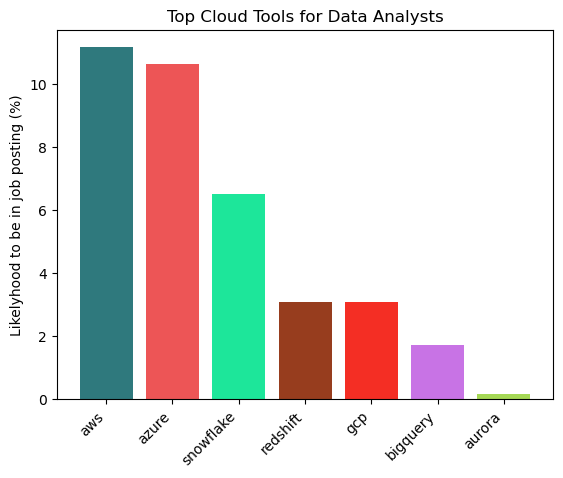

     keywords  counts  percentage
6         aws      65   11.149228
7       azure      62   10.634648
10  snowflake      38    6.518010
20   redshift      18    3.087479
21        gcp      18    3.087479
39   bigquery      10    1.715266
92     aurora       1    0.171527


In [25]:
filtered_keywords(df, keywords_cloud_tools, title="Top Cloud Tools for Data Analysts")

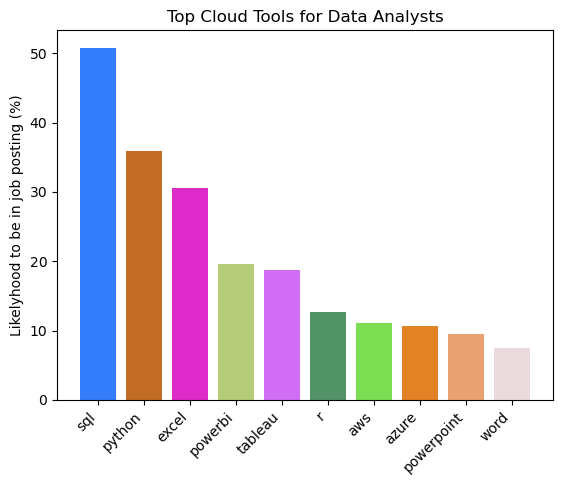

     keywords  counts  percentage
0         sql     296   50.771870
1      python     209   35.849057
2       excel     178   30.531732
3     powerbi     114   19.554031
4     tableau     109   18.696398
5           r      74   12.692967
6         aws      65   11.149228
7       azure      62   10.634648
8  powerpoint      55    9.433962
9        word      44    7.547170


In [26]:
filtered_keywords(df, keywords, title="Top Cloud Tools for Data Analysts")

# End